<a href="https://colab.research.google.com/github/hawkeyedatatsai/PCA-Exercise/blob/main/5_PCA_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Your task is to perform PCA to speed up a classification algorithm on a high-dimensional dataset. You will fit a model on the original scaled data, and a different one on data after transformation using a PCA model. You will compare the computation time and the evaluation scores.

We will use the [MNIST digits dataset](https://en.wikipedia.org/wiki/MNIST_database), which comes pre-installed in sklearn. This dataset has 28x28 pixel images of handwritten digits 0-9. Your task is to classify these to determine which digits they are.

Use PCA to lower the dimensions in this dataset while retaining 95% of the variance. You can do this when instantiating the PCA by giving the `n_components=` argument a float between 0 and 1.



In [1]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [8]:
#Prepare the Data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
classification_report, ConfusionMatrixDisplay, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.core.display import clear_output
X = mnist.data
y = mnist.target
X.shape

(70000, 784)

In [3]:
scaler = StandardScaler()
#Fit & transform data.
scaled_df = scaler.fit_transform(X)
# Instantiate & fit data using PCA
pca = PCA(n_components=.95)

#Create 2 KNN models

##KNN models with PCA transformed data

In [4]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), pca)
#Put PCA Pipeline in Another Pipeline with a Logistic Regression
knn = KNeighborsClassifier()
# Create a modeling pipeline
knn_pca_pipe = make_pipeline(transformer, knn)
knn_pca_pipe.fit(X_train, y_train)
#evaluate model
print('Training accuracy:', knn_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pca_pipe.score(X_test, y_test))

Training accuracy: 0.9650285714285715
Testing accuracy: 0.9477714285714286


##KNN models without PCA transformed data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(StandardScaler(), knn)
knn_pipe.fit(X_train, y_train)
#evaluate model
print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pipe.score(X_test, y_test))

Training accuracy: 0.9625904761904762
Testing accuracy: 0.9442285714285714


#Evaluate and compare the models.

CPU times: user 43.7 s, sys: 278 ms, total: 44 s
Wall time: 34.5 s


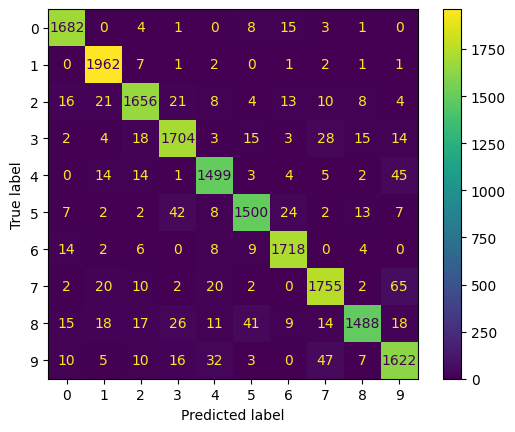

In [9]:
%%time
knn_pca_pred = knn_pca_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pca_pred);

CPU times: user 1min 36s, sys: 191 ms, total: 1min 36s
Wall time: 60 s


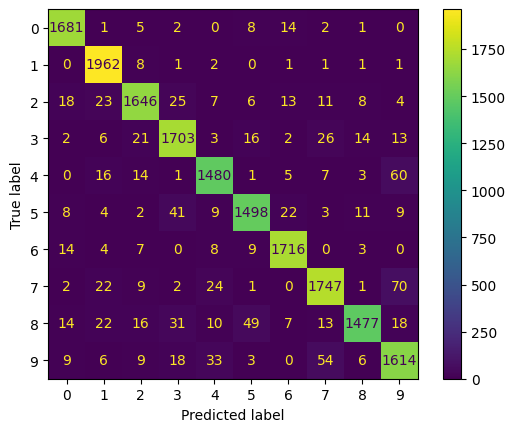

In [10]:
%%time
knn_pred = knn_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred);

#Answer the Following Questions in the Text:


##Which model performed the best on the test set?

Comparing accuracy on testing data, KNN with the PCA transformed performances slightly higher the KNN without the PCA transformed, .947 vs .942.


##Which model was the fastest at making predictions?

KNN with the PCA transformed makes predictions faster. 44 sec vs 1 min 36 sec